In [1]:
from collections import namedtuple
from operator import itemgetter
from pprint import pformat
 
class Node(namedtuple('Node', 'location left_child right_child')):
 
    def __repr__(self):
        return pformat(tuple(self))
 
def kdtree(point_list, depth=0):

    # assumes all points have the same dimension
    try:
        k = len(point_list[0])
    except IndexError:
        return None
 
    # Select axis based on depth so that axis cycles through
    # all valid values
    axis = depth % k
 
    # Sort point list and choose median as pivot element
    point_list.sort(key=itemgetter(axis))
    median = len(point_list) // 2         # choose median
 
    # Create node and construct subtrees
    return Node(
        location=point_list[median],
        left_child=kdtree(point_list[:median], depth + 1),
        right_child=kdtree(point_list[median + 1:], depth + 1)
    )

In [2]:
import pandas as pd
import random
import numpy as np

min_val = 0   # minimal coordinate value
max_val = 9  # maximal coordinate value

df = pd.read_csv('points.txt', header=None)
#     points = points.apply(pd.to_numeric)
df.columns = ['xy']
df['x'], df['y'] = df['xy'].str.split(' ', 1).str
df = df.drop(['xy'], axis=1)
df = df.apply(pd.to_numeric)

#     print(df)
#     print(df.shape)
point_list = [tuple(x) for x in df.values]
# construct a K-D tree
tree = kdtree(point_list)
print(tree)

((4, 2),
 ((1, 3),
 ((2, 1), ((0, 2), None, None), None),
 ((3, 4), ((0, 5), None, None), None)),
 ((6, 3), ((7, 1), ((6, 0), None, None), None), ((5, 5), None, None)))


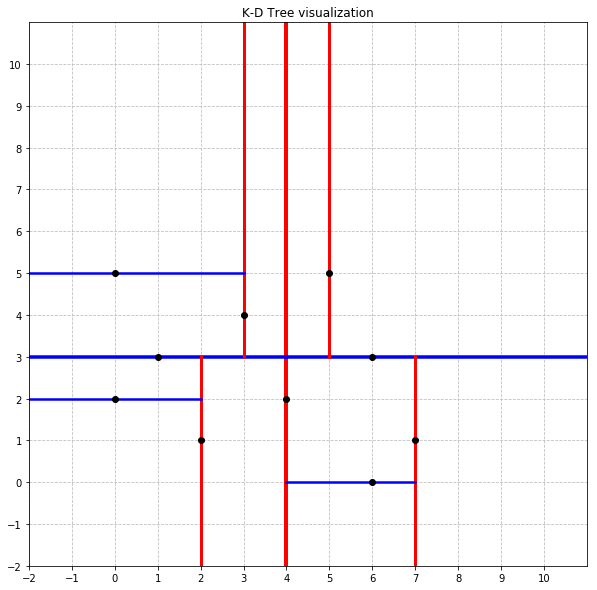

In [8]:
import matplotlib.pyplot as plt
 
# line width for visualization of K-D tree
line_width = [4., 3.5, 3., 2.5, 2., 1.5, 1., .5, 0.3]
delta = 2 
def plot_tree(tree, min_x, max_x, min_y, max_y, prev_node, branch, depth=0):
    cur_node = tree.location         # current tree's node
    left_branch = tree.left_child    # its left branch
    right_branch = tree.right_child  # its right branch
 
    # set line's width depending on tree's depth
    if depth > len(line_width)-1:
        ln_width = line_width[len(line_width)-1]
    else:
        ln_width = line_width[depth]
 
    k = len(cur_node)
    axis = depth % k
 
    # draw a vertical splitting line
    if axis == 0:
 
        if branch is not None and prev_node is not None:
 
            if branch:
                max_y = prev_node[1]
            else:
                min_y = prev_node[1]
 
        plt.plot([cur_node[0],cur_node[0]], [min_y,max_y], linestyle='-', color='red', linewidth=ln_width)
 
    # draw a horizontal splitting line
    elif axis == 1:
 
        if branch is not None and prev_node is not None:
 
            if branch:
                max_x = prev_node[0]
            else:
                min_x = prev_node[0]
 
        plt.plot([min_x,max_x], [cur_node[1],cur_node[1]], linestyle='-', color='blue', linewidth=ln_width)
 
    # draw the current node
    plt.plot(cur_node[0], cur_node[1], 'ko')
 
    # draw left and right branches of the current node
    if left_branch is not None:
        plot_tree(left_branch, min_x, max_x, min_y, max_y, cur_node, True, depth+1)
 
    if right_branch is not None:
        plot_tree(right_branch, min_x, max_x, min_y, max_y, cur_node, False, depth+1)
 
plt.figure("K-d Tree", figsize=(10., 10.))
plt.axis( [min_val-delta, max_val+delta, min_val-delta, max_val+delta] )
 
plt.grid(b=True, which='major', color='0.75', linestyle='--')
plt.xticks([i for i in range(min_val-delta, max_val+delta, 1)])
plt.yticks([i for i in range(min_val-delta, max_val+delta, 1)])
 
# draw the tree
plot_tree(tree, min_val-delta, max_val+delta, min_val-delta, max_val+delta, None, None)
 
plt.title('K-D Tree visualization')
plt.show()
plt.close()
